# Pryngles Tutorials: Developers
## Part 6 - Legacy with reflection

This notebook illustrate in detail the interface of the `Pryngles` package. It is especially intended for developers.

Authors:
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.7.3.1 of `Pryngles`.
- It is still working under version 0.9.0.
- Matplotlib commands run in version 3.5.2.

<center><font color='red' size='8'><i>This tutorial is under construction.</i></font></center>

## Preparation

Before running this tutorial you need to install `Pryngles`:

In [1]:
#!python -m pip install -qU pryngles
#!pip show pryngles

If you are running this tutrial in `Google Colab` please run the following lines:

In [2]:
"""
import matplotlib.pyplot as plt
RESOLUTION = 150
%matplotlib inline
plt.rcParams['figure.dpi'] = RESOLUTION
# Sometimes you need to run twice this magic to be sure the backend is loaded
%matplotlib inline
#""";

## Import useful packages

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Although it is not a good practice to import everything of a package, for this tutorial and to avoid excesively large names we will import everything from Pryngles:

In [2]:
from pryngles import *
from pryngles import pixx
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Update Reflection method

This code is intended to test the updateReflection method contributed by Allard to the legacy module.

Create system:

In [3]:
sys_test = System()
s=sys_test.add(kind="Star",physics=dict(radius=Consts.rsun/sys_test.ul),optics=dict(limb_coeffs=[0.65]))
p=sys_test.add(kind="Planet", primary=s,
               orbit=dict(a=3, e=0.0),
               physics=dict(radius=Consts.rsaturn/sys_test.ul),
               optics=dict(nspangles=10000))
r=sys_test.add(kind="Ring", primary=p,
               physics=dict(fi=1.5, fe=2.25, i=30*Consts.deg,roll=90*Consts.deg),
               optics=dict(nspangles=10000))
RP_test=sys_test.ensamble_system()

Initialize orbit:

In [5]:
RP_test.changeObserver([-90*Consts.deg,60*Consts.deg])

# Star apparant size
thetas=RP_test.thetas

# Range of stellar longitude
lamb_initial=90*Consts.deg
lamb_final=450*Consts.deg
lambs=np.linspace(lamb_initial,lamb_final,181)

Now compute fluxes:

In [6]:
# New
Rps_test=[]
Rrs_test=[]
Pp = []
Pr = []
Ptot=[]
Qr=[]
Qp=[]
Qtot=[]
Ur=[]
Up=[]
Utot=[]
alpha=[]
ts_test=[]
Tp_test = []
Tr_test = []
T_test = []

# Save data
save_array = np.zeros((6,181))

# Plot data
cmaxo = 1
cmino = 1e-6

# Old
Rps=[]
Rrs=[]
ts=[]

ii = 0

reflec_time = []
for lamb in tqdm(lambs):
    st = time.time()
    RP_test.changeStellarPosition(lamb)
    ts_test+=[RP_test.t*RP_test.CU.UT]
    #print("True anomaly: ", lamb/Consts.deg)
    RP_test.updateOpticalFactors()
    et = time.time()
    #print("Time geometry takes: ", et - st)
    
    st = time.time()
    RP_test.updateReflection()
    et = time.time()
    reflec_time += [et-st]
    #print("Time reflection takes: ", et - st)
    
    Rps_test+=[RP_test.Rip.sum()]
    Rrs_test+=[RP_test.Rir.sum()]
    Pp += [RP_test.Ptotp]
    Pr += [RP_test.Ptotr]
    Ptot+=[RP_test.Ptot]
    Qr+=[RP_test.Stotr[1]]
    Qp+=[RP_test.Stotp[1]]
    Qtot+=[RP_test.Stot[1]]
    Ur+=[RP_test.Stotr[2]]
    Up+=[RP_test.Stotp[2]]
    Utot+=[RP_test.Stot[2]]
    alpha+=[np.arccos(RP_test.alphaps)*180/np.pi]

100%|██████████| 181/181 [01:12<00:00,  2.48it/s]


Compute statistics:

In [7]:
# New
ts_test=np.array(ts_test)
Rps_test=np.array(Rps_test)
Rrs_test=np.array(Rrs_test)
Pp=np.array(Pp)
Pr=np.array(Pr)
Ptot=np.array(Ptot)
Qr=np.array(Qr)
Qp=np.array(Qp)
Qtot=np.array(Qtot)
Ur=np.array(Ur)
Up=np.array(Up)
Utot=np.array(Utot)
alpha=np.array(alpha)
Tp_test = np.array(Tp_test)
Tr_test = np.array(Tr_test)
T_test = np.array(T_test)

ind = np.argmax(alpha)
indstart = np.argsort(alpha)[0]

reflec_time = np.array(reflec_time)
print("Average reflection time: ", np.mean(reflec_time))

ts_test=(ts_test-ts_test[0])/Consts.day

Average reflection time:  0.38671231138113454


Plot:

<IPython.core.display.Javascript object>


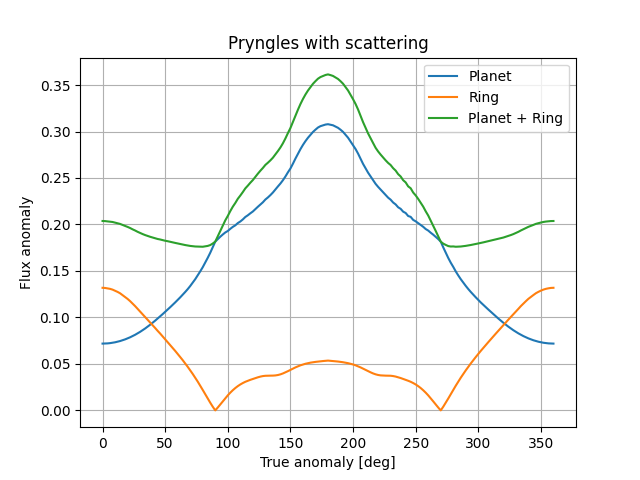

In [8]:
#Plot
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs*180/np.pi-90,Rps_test,label="Planet")
ax.plot(lambs*180/np.pi-90,Rrs_test,label="Ring")
ax.plot(lambs*180/np.pi-90,Rps_test+Rrs_test,label="Planet + Ring")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Flux anomaly")
ax.set_title("Pryngles with scattering")
ax.legend();
ax.grid()

<IPython.core.display.Javascript object>


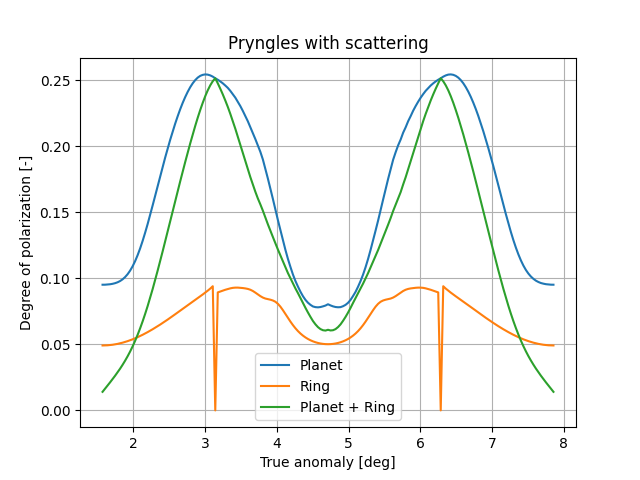

In [10]:
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs,Pp,label="Planet")
ax.plot(lambs,Pr,label="Ring")
ax.plot(lambs,Ptot,label="Planet + Ring")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Degree of polarization [-]")
ax.set_title("Pryngles with scattering")
ax.legend();
ax.grid()
plt.show()

<IPython.core.display.Javascript object>


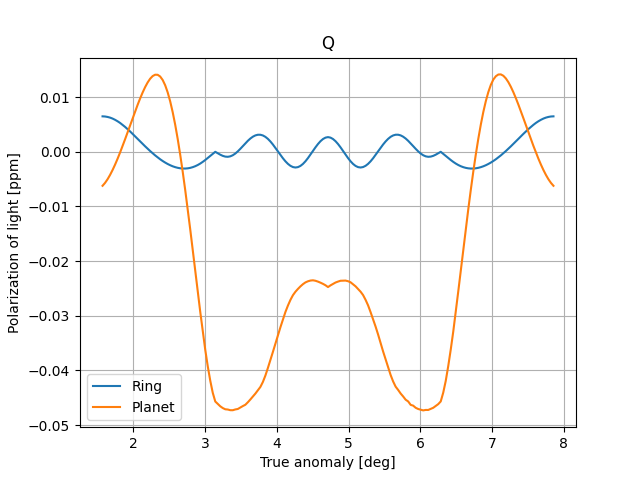

In [11]:
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs,Qr,label="Ring")
ax.plot(lambs,Qp,label="Planet")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Polarization of light [ppm]")
ax.set_title("Q")
ax.legend();
ax.grid()
plt.show()

<IPython.core.display.Javascript object>


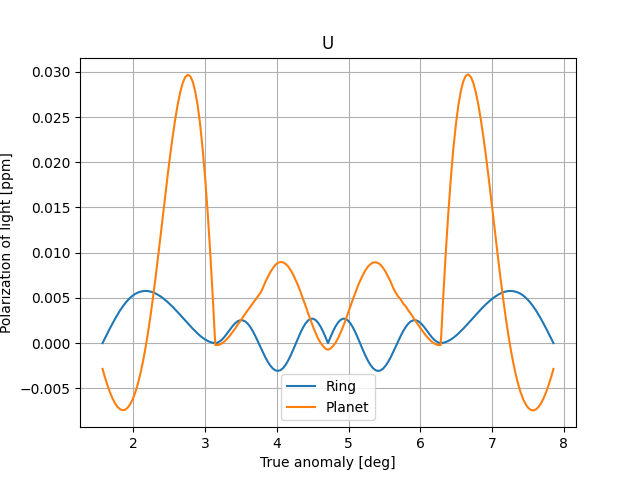

In [12]:
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs,Ur,label="Ring")
ax.plot(lambs,Up,label="Planet")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Polarization of light [ppm]")
ax.set_title("U")
ax.legend();
ax.grid()
plt.show()

<IPython.core.display.Javascript object>


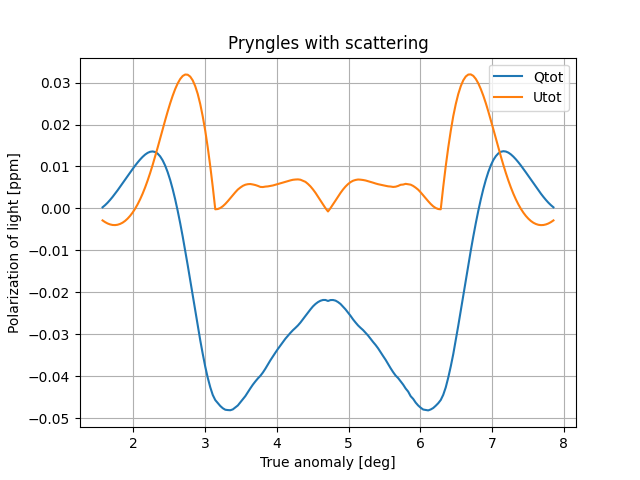

In [14]:
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs,Qtot,label="Qtot")
ax.plot(lambs,Utot,label="Utot")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Polarization of light [ppm]")
ax.set_title("Pryngles with scattering")
ax.legend();
ax.grid()
plt.show()

--- 
*The authors*, Last update: november, 2022.